In [631]:
import warnings
warnings.filterwarnings('ignore')

In [941]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [890]:
avg15_09_ori = pd.read_csv('aptPriceDataSet/avg15.09.csv', header=3, thousands=',')
avg18_07_ori = pd.read_csv('aptPriceDataSet/avg18.07.csv', header=0, thousands=',')
shop_201806_01_ori = pd.read_csv('aptPriceDataSet/shop_201806_01.csv', header=0)

In [891]:
# 원본 DataFrame 유지를 위해 복사본 생성

avg15_09 = avg15_09_ori
avg18_07 = avg18_07_ori

In [892]:
avg15_09_ori.head(10)

,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월.1,4월.1,5월.1,6월.1,7월.1,8월.1,9월.1,전월비,전년말비,전년동월비
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333,...,8563,8613,8624,8627,8643,8678,8665,-13,82,207
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1434
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,1,430,477
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,27,400,350
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,-162,-150,-131
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,334,281
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,68,610,414
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648,...,8692,8858,8967,8942,8984,9058,9023,-36,325,352
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160


In [893]:
avg18_07_ori.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [894]:
avg15_09_ori.iloc[:,0:10]

,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124


In [895]:
avg15_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      7 non-null      object
 1   시군구     14 non-null     object
 2   12월     21 non-null     int64 
 3   1월      21 non-null     int64 
 4   2월      21 non-null     int64 
 5   3월      21 non-null     int64 
 6   4월      21 non-null     int64 
 7   5월      21 non-null     int64 
 8   6월      21 non-null     int64 
 9   7월      21 non-null     int64 
 10  8월      21 non-null     int64 
 11  9월      21 non-null     int64 
 12  10월     21 non-null     int64 
 13  11월     21 non-null     int64 
 14  12월.1   21 non-null     int64 
 15  1월.1    21 non-null     int64 
 16  2월.1    21 non-null     int64 
 17  3월.1    21 non-null     int64 
 18  4월.1    21 non-null     int64 
 19  5월.1    21 non-null     int64 
 20  6월.1    21 non-null     int64 
 21  7월.1    21 non-null     int64 
 22  8월.1    21 non-null     int6

In [896]:
# 전월비, 전년말비, 전년동월비의 데이터를 직접 계산하여 확인하는 과정
avg15_09['전월비확인'] = None  # 컬럼생성 test

avg15_09['전월비확인'] = avg15_09['9월.1'].astype(int) - avg15_09['8월.1'].astype(int)
avg15_09['전년말비확인'] = avg15_09['9월.1'].astype(int) - avg15_09['12월.1'].astype(int)
avg15_09['전년동월비확인'] = avg15_09['9월.1'].astype(int) - avg15_09['9월'].astype(int)

avg15_09

,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,6월.1,7월.1,8월.1,9월.1,전월비,전년말비,전년동월비,전월비확인,전년말비확인,전년동월비확인
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333,...,8627,8643,8678,8665,-13,82,207,-13,81,206
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742,...,18374,18152,18443,17969,-474,-2300,-1434,-474,-2300,-1435
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9515,9559,9581,9608,1,430,477,27,400,350
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8542,8542,8795,8863,27,400,350,68,610,414
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,10443,10443,10449,10450,-162,-150,-131,1,430,477
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7881,8089,8231,8083,-148,334,281,-148,335,281
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8079,8079,8079,7917,68,610,414,-162,-150,-131
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,9190,9190,9215,9215,0,324,722,0,324,722
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648,...,8942,8984,9058,9023,-36,325,352,-35,325,352
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124,...,10573,10518,10573,10341,-232,-38,-160,-232,-38,-160


In [897]:
# 전월비, 전년말비, 전년동월비의 값의 위치가 바뀌어 있어서 새로 계산해서 만듦/ 기존데이터는 삭제
# avg15_09.drop(columns=["전월비"], axis=1)
avg15_09.columns
# del avg15_09['전년동월비']
avg15_09.drop(columns=["전월비","전년말비","전년동월비"], axis=1, inplace=True) # drop을 이용해서 컬럼삭제
avg15_09

,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월.1,4월.1,5월.1,6월.1,7월.1,8월.1,9월.1,전월비확인,전년말비확인,전년동월비확인
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333,...,8563,8613,8624,8627,8643,8678,8665,-13,81,206
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1435
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,27,400,350
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,68,610,414
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,1,430,477
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,335,281
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,-162,-150,-131
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648,...,8692,8858,8967,8942,8984,9058,9023,-35,325,352
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160


In [898]:
avg15_09.columns

Index(['시도', '시군구', '12월', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월.1', '1월.1', '2월.1', '3월.1', '4월.1', '5월.1',
       '6월.1', '7월.1', '8월.1', '9월.1', '전월비확인', '전년말비확인', '전년동월비확인'],
      dtype='object')

In [899]:
# 컬럼명 보기좋게 바꿈

avg15_09.columns = ['시도', '시군구', '2013_12', '2014_1', '2014_2', '2014_3', '2014_4', '2014_5', '2014_6', '2014_7', '2014_8',
       '2014_9', '2014_10', '2014_11', '2014_12', '2015_1', '2015_2', '2015_3', '2015_4', '2015_5',
       '2015_6', '2015_7', '2015_8', '2015_9', '전월비확인', '전년말비확인', '전년동월비확인']
avg15_09

,시도,시군구,2013_12,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,...,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,전월비확인,전년말비확인,전년동월비확인
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333,...,8563,8613,8624,8627,8643,8678,8665,-13,81,206
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1435
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,27,400,350
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,68,610,414
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,1,430,477
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,335,281
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,-162,-150,-131
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648,...,8692,8858,8967,8942,8984,9058,9023,-35,325,352
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160


In [900]:
# avg18_07컬럼명 확인
avg18_07.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [901]:
# avg18_07 결측치인 row 확인
avg18_07[avg18_07['분양가격(㎡)'].isnull()]

,지역명,규모구분,연도,월,분양가격(㎡)
368,광주,전용면적 85㎡초과 102㎡이하,2016,2,NaN
369,광주,전용면적 102㎡초과,2016,2,NaN
374,대전,전용면적 102㎡초과,2016,2,NaN
388,강원,전용면적 85㎡초과 102㎡이하,2016,2,NaN
421,제주,전용면적 60㎡이하,2016,2,NaN
...,...,...,...,...,...
2841,울산,전용면적 60㎡이하,2018,7,NaN
2843,울산,전용면적 85㎡초과 102㎡이하,2018,7,NaN
2844,울산,전용면적 102㎡초과,2018,7,NaN
2878,경북,전용면적 85㎡초과 102㎡이하,2018,7,NaN


In [902]:
# avg18_07['분양가격(㎡)'] 결측치때문에 계산이 안되므로 0으로 대체
# fillna(결측치에 적용될 데이터, inplace=True(갱신된내용 원본에 적용))

avg18_07['분양가격(㎡)'].fillna('0', inplace=True)
avg18_07[avg18_07['분양가격(㎡)'].isnull()]     # 결측치 없어짐

,지역명,규모구분,연도,월,분양가격(㎡)


In [903]:
avg18_07.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

In [904]:
 avg18_07['분양가격(㎡)']

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
2885    3334
2886       0
2887    3356
2888    3226
2889    2990
Name: 분양가격(㎡), Length: 2890, dtype: object

In [905]:
# 결측치 외에도 '  '와 같이 공백으로 채워진 데이터 확인

avg18_07[avg18_07['분양가격(㎡)']=='  ']

,지역명,규모구분,연도,월,분양가격(㎡)
28,광주,전용면적 85㎡초과 102㎡이하,2015,10,
29,광주,전용면적 102㎡초과,2015,10,
34,대전,전용면적 102㎡초과,2015,10,
81,제주,전용면적 60㎡이하,2015,10,
113,광주,전용면적 85㎡초과 102㎡이하,2015,11,
114,광주,전용면적 102㎡초과,2015,11,
119,대전,전용면적 102㎡초과,2015,11,
166,제주,전용면적 60㎡이하,2015,11,
198,광주,전용면적 85㎡초과 102㎡이하,2015,12,
199,광주,전용면적 102㎡초과,2015,12,


In [906]:
avg18_07[avg18_07['분양가격(㎡)']=='  '] = '0'
avg18_07

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,0
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226


In [907]:
avg18_07.dtypes

지역명        object
규모구분       object
연도         object
월          object
분양가격(㎡)    object
dtype: object

In [908]:
for i in avg18_07['분양가격(㎡)']:
    if ',' in i:
        print('comma')

comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma
comma


In [909]:
avg18_07

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,0
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226


In [910]:
avg18_07[avg18_07['분양가격(㎡)'].str.contains(',')

SyntaxError: unexpected EOF while parsing (<ipython-input-910-fc24535339e1>, line 1)

In [911]:
avg18_07['분양가격(㎡)'] = avg18_07['분양가격(㎡)'].str.replace(',', '')

# 출처: https://rfriend.tistory.com/463 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [912]:
avg18_07['분양가격(3.3㎡)'] = None
avg18_07['분양가격(3.3㎡)'] = (avg18_07['분양가격(㎡)'].astype(int) * 3.3).astype(int)
avg18_07

,지역명,규모구분,연도,월,분양가격(㎡),분양가격(3.3㎡)
0,서울,전체,2015,10,5841,19275
1,서울,전용면적 60㎡이하,2015,10,5652,18651
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879
4,서울,전용면적 102㎡초과,2015,10,5879,19400
...,...,...,...,...,...,...
2885,제주,전체,2018,7,3334,11002
2886,제주,전용면적 60㎡이하,2018,7,0,0
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356,11074
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226,10645


In [913]:
avg15_09

,시도,시군구,2013_12,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,...,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,전월비확인,전년말비확인,전년동월비확인
0,전국,NaN,8059,8130,8195,8204,8289,8358,8344,8333,...,8563,8613,8624,8627,8643,8678,8665,-13,81,206
1,서울,NaN,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1435
2,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,27,400,350
3,NaN,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,68,610,414
4,NaN,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,1,430,477
5,NaN,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,335,281
6,NaN,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,-162,-150,-131
7,NaN,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
8,NaN,NaN,8151,8355,8597,8552,8585,8606,8669,8648,...,8692,8858,8967,8942,8984,9058,9023,-35,325,352
9,경기,NaN,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160


In [914]:
avg15_09.loc[3:8, '시도'] = '6대광역시'
avg15_09.drop(index=8, inplace=True)
avg15_09.drop(index=20, inplace=True)
avg15_09.loc[13:20, '시도'] = '지방'
avg15_09.loc[1, '시군구'] = '서울'
avg15_09.loc[9, '시군구'] = '경기'
avg15_09.loc[11, '시군구'] = '세종'
avg15_09.drop(index=0, inplace=True)
avg15_09.drop(index=10, inplace=True)
avg15_09 = avg15_09.reset_index(drop=True)
avg15_09


,시도,시군구,2013_12,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,...,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,전월비확인,전년말비확인,전년동월비확인
0,서울,서울,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1435
1,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,27,400,350
2,6대광역시,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,68,610,414
3,6대광역시,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,1,430,477
4,6대광역시,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,335,281
5,6대광역시,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,-162,-150,-131
6,6대광역시,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
7,경기,경기,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160
8,세종,세종,7601,7600,7532,7814,7908,7934,8067,8067,...,8555,8546,8546,8671,8669,8695,8715,20,155,433
9,지방,강원,6230,6230,6230,6141,6373,6350,6350,6268,...,6182,6924,6846,6986,7019,7008,7121,113,756,702


In [915]:
avg18_07.drop(columns=['분양가격(㎡)'], axis=1, inplace=True)
avg18_07

,지역명,규모구분,연도,월,분양가격(3.3㎡)
0,서울,전체,2015,10,19275
1,서울,전용면적 60㎡이하,2015,10,18651
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,19410
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,18879
4,서울,전용면적 102㎡초과,2015,10,19400
...,...,...,...,...,...
2885,제주,전체,2018,7,11002
2886,제주,전용면적 60㎡이하,2018,7,0
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,11074
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,10645


In [916]:
avg18_07_all = avg18_07[avg18_07['규모구분']=='전체']
avg18_07_all

,지역명,규모구분,연도,월,분양가격(3.3㎡)
0,서울,전체,2015,10,19275
5,인천,전체,2015,10,10437
10,경기,전체,2015,10,10355
15,부산,전체,2015,10,10269
20,대구,전체,2015,10,8850
...,...,...,...,...,...
2865,전북,전체,2018,7,7698
2870,전남,전체,2018,7,7778
2875,경북,전체,2018,7,8824
2880,경남,전체,2018,7,8896


In [917]:
avg18_07_all['연도'] = avg18_07_all['연도'].astype(str) + '_' + avg18_07_all['월'].astype(str)
avg18_07_all

,지역명,규모구분,연도,월,분양가격(3.3㎡)
0,서울,전체,2015_10,10,19275
5,인천,전체,2015_10,10,10437
10,경기,전체,2015_10,10,10355
15,부산,전체,2015_10,10,10269
20,대구,전체,2015_10,10,8850
...,...,...,...,...,...
2865,전북,전체,2018_7,7,7698
2870,전남,전체,2018_7,7,7778
2875,경북,전체,2018_7,7,8824
2880,경남,전체,2018_7,7,8896


In [918]:
avg18_07_all.drop(['월'], axis=1, inplace=True)
avg18_07_all

,지역명,규모구분,연도,분양가격(3.3㎡)
0,서울,전체,2015_10,19275
5,인천,전체,2015_10,10437
10,경기,전체,2015_10,10355
15,부산,전체,2015_10,10269
20,대구,전체,2015_10,8850
...,...,...,...,...
2865,전북,전체,2018_7,7698
2870,전남,전체,2018_7,7778
2875,경북,전체,2018_7,8824
2880,경남,전체,2018_7,8896


In [919]:
avg18_07_all = avg18_07_all.reset_index(drop=True)
avg18_07_all

,지역명,규모구분,연도,분양가격(3.3㎡)
0,서울,전체,2015_10,19275
1,인천,전체,2015_10,10437
2,경기,전체,2015_10,10355
3,부산,전체,2015_10,10269
4,대구,전체,2015_10,8850
...,...,...,...,...
573,전북,전체,2018_7,7698
574,전남,전체,2018_7,7778
575,경북,전체,2018_7,8824
576,경남,전체,2018_7,8896


In [920]:
avg18_07_all.drop(['규모구분'], axis=1, inplace=True)
avg18_07_all

,지역명,연도,분양가격(3.3㎡)
0,서울,2015_10,19275
1,인천,2015_10,10437
2,경기,2015_10,10355
3,부산,2015_10,10269
4,대구,2015_10,8850
...,...,...,...
573,전북,2018_7,7698
574,전남,2018_7,7778
575,경북,2018_7,8824
576,경남,2018_7,8896


In [921]:
avg18_07_all.columns

Index(['지역명', '연도', '분양가격(3.3㎡)'], dtype='object')

In [922]:
avg15_09_con = avg15_09
avg15_09

,시도,시군구,2013_12,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,...,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,전월비확인,전년말비확인,전년동월비확인
0,서울,서울,18189,17925,17925,18016,18098,19446,18867,18742,...,19415,18842,18367,18374,18152,18443,17969,-474,-2300,-1435
1,6대광역시,부산,8111,8111,9078,8965,9402,9501,9453,9457,...,9279,9327,9345,9515,9559,9581,9608,27,400,350
2,6대광역시,대구,8080,8080,8077,8101,8267,8274,8360,8360,...,8441,8446,8568,8542,8542,8795,8863,68,610,414
3,6대광역시,인천,10204,10204,10408,10408,10000,9844,10058,9974,...,9876,9938,10551,10443,10443,10449,10450,1,430,477
4,6대광역시,광주,6098,7326,7611,7346,7346,7523,7659,7612,...,7861,7914,7877,7881,8089,8231,8083,-148,335,281
5,6대광역시,대전,8321,8321,8321,8341,8341,8341,8333,8333,...,8067,8145,8272,8079,8079,8079,7917,-162,-150,-131
6,6대광역시,울산,8090,8090,8090,8153,8153,8153,8153,8153,...,8629,9380,9192,9190,9190,9215,9215,0,324,722
7,경기,경기,10855,10855,10791,10784,10876,10646,10266,10124,...,10469,10684,10685,10573,10518,10573,10341,-232,-38,-160
8,세종,세종,7601,7600,7532,7814,7908,7934,8067,8067,...,8555,8546,8546,8671,8669,8695,8715,20,155,433
9,지방,강원,6230,6230,6230,6141,6373,6350,6350,6268,...,6182,6924,6846,6986,7019,7008,7121,113,756,702


In [923]:
avg15_09_con1 = avg15_09_con.loc[:, '2013_12':'2015_9']
avg15_09_con1

,2013_12,2014_1,2014_2,2014_3,2014_4,2014_5,2014_6,2014_7,2014_8,2014_9,...,2014_12,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9
0,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,...,20269,20670,20670,19415,18842,18367,18374,18152,18443,17969
1,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,...,9208,9204,9235,9279,9327,9345,9515,9559,9581,9608
2,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,...,8253,8327,8416,8441,8446,8568,8542,8542,8795,8863
3,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,...,10020,10017,9876,9876,9938,10551,10443,10443,10449,10450
4,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,...,7748,7752,7756,7861,7914,7877,7881,8089,8231,8083
5,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,...,8067,8067,8067,8067,8145,8272,8079,8079,8079,7917
6,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,...,8891,8526,8526,8629,9380,9192,9190,9190,9215,9215
7,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,...,10379,10391,10355,10469,10684,10685,10573,10518,10573,10341
8,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,...,8560,8560,8560,8555,8546,8546,8671,8669,8695,8715
9,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,...,6365,6348,6350,6182,6924,6846,6986,7019,7008,7121


In [924]:
avg15_09_stk = avg15_09_con1.stack().to_frame().reset_index()
# avg15_09_stk.drop([0, 1],inplace=True)
# avg15_09_stk.drop([456, 457, 458], inplace=True)

In [925]:
avg15_09_stk

,level_0,level_1,0
0,0,2013_12,18189
1,0,2014_1,17925
2,0,2014_2,17925
3,0,2014_3,18016
4,0,2014_4,18098
...,...,...,...
369,16,2015_5,7285
370,16,2015_6,7343
371,16,2015_7,7343
372,16,2015_8,7343


In [928]:
avg15_09_stk.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [929]:
avg15_09_stk.columns = ['지역명', '연도', '분양가격(3.3㎡)']
avg15_09_stk

,지역명,연도,분양가격(3.3㎡)
0,0,2013_12,18189
1,0,2014_1,17925
2,0,2014_2,17925
3,0,2014_3,18016
4,0,2014_4,18098
...,...,...,...
369,16,2015_5,7285
370,16,2015_6,7343
371,16,2015_7,7343
372,16,2015_8,7343


In [930]:
avg15_09_stk['지역명'][avg15_09_stk['지역명']==0]='서울'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==1]='부산'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==2]='대구'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==3]='인천'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==4]='광주'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==5]='대전'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==6]='울산'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==7]='경기'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==8]='세종'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==9]='강원'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==10]='충북'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==11]='충남'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==12]='전북'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==13]='전남'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==14]='경북'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==15]='경남'
avg15_09_stk['지역명'][avg15_09_stk['지역명']==16]='제주'

avg15_09_stk

,지역명,연도,분양가격(3.3㎡)
0,서울,2013_12,18189
1,서울,2014_1,17925
2,서울,2014_2,17925
3,서울,2014_3,18016
4,서울,2014_4,18098
...,...,...,...
369,제주,2015_5,7285
370,제주,2015_6,7343
371,제주,2015_7,7343
372,제주,2015_8,7343


In [931]:
result = pd.concat([avg15_09_stk,avg18_07_all])
result.dtypes

지역명           object
연도            object
분양가격(3.3㎡)     int64
dtype: object

In [932]:
result[result['분양가격(3.3㎡)']=='6대광역시']

,지역명,연도,분양가격(3.3㎡)


In [933]:
avg18_07_all

,지역명,연도,분양가격(3.3㎡)
0,서울,2015_10,19275
1,인천,2015_10,10437
2,경기,2015_10,10355
3,부산,2015_10,10269
4,대구,2015_10,8850
...,...,...,...
573,전북,2018_7,7698
574,전남,2018_7,7778
575,경북,2018_7,8824
576,경남,2018_7,8896


<AxesSubplot:xlabel='지역명'>

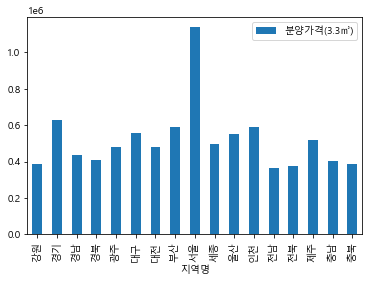

In [943]:
plt.rcParams['font.family'] = 'Malgun Gothic'
result.groupby('지역명').sum().plot.bar()

<AxesSubplot:xlabel='지역명'>

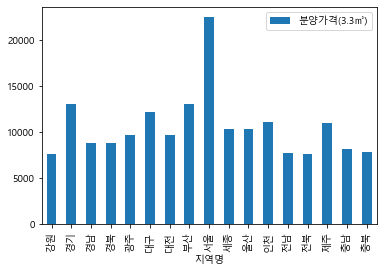

In [944]:
result[result['연도']=='2018_7'].groupby('지역명').sum().plot.bar()

In [934]:
result.sort_values(by='지역명')

,지역명,연도,분양가격(3.3㎡)
434,강원,2017_11,7652
9,강원,2015_10,7151
217,강원,2015_7,7019
198,강원,2013_12,6230
218,강원,2015_8,7008
...,...,...,...
316,충북,2017_4,6732
333,충북,2017_5,6765
435,충북,2017_11,6854
197,충북,2016_9,7012
